# HW3 - Won't You Be My Neighbor?

The digits dataset in sklearn is a sample of a [more complete dataset](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits).  Ours has 1,797 examples of classified hand-written digits 0-9 stored as pixel arrays with color from 0 (white) to 15 (black).

Your problem is to:
* train a kNeighestNeighbors classifier on the digits set
* demonstrate that your classifier works adequately well
* load one sample of your handwriting for each of the 10 digits 
* classify each of your samples and display them side-by-side with their nearest neighbor in the digits dataset

Notes:
* [Tutorial 2-2](https://github.com/mdaugherity/PatternRecognition/blob/master/Tutorial%202-2.ipynb) covered the built-in datasets
* The [return_X_y](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) parameter can make life easier
* Notice in the digits dataset we get both digits.images as 8x8 2D arrays and digits.data as a 1D array.  Use the right one for the right thing.
* There is a built in function to return neighbors.  Always read the documentation.

***

# The Digits Dataset
Here's some code to help you get started.  Again, you won't want all this in your final report. 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


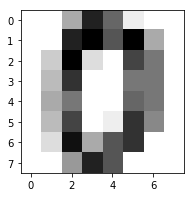

In [2]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


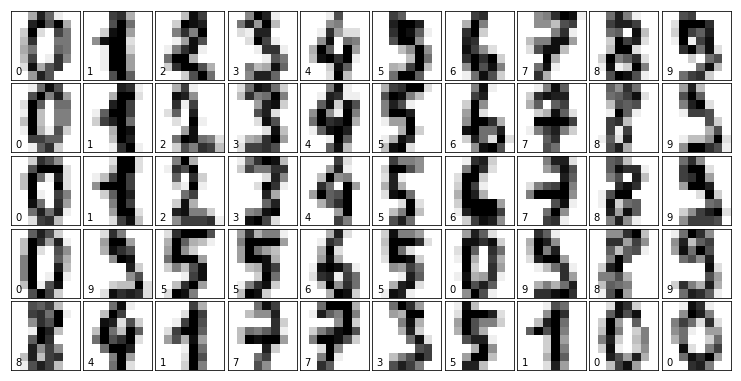

In [4]:
fig = plt.figure(figsize=(10, 5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5,10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

## Measuring "Distances"
The default for kNearestNeighbors is the normal "Euclidean" distance.  We can change this or set a custom function by interfacing with the [DistanceMetric class](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric)


In [5]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')

dist.pairwise?

Docstring:
Compute the pairwise distances between X and Y

This is a convenience routine for the sake of testing.  For many
metrics, the utilities in scipy.spatial.distance.cdist and
scipy.spatial.distance.pdist will be faster.

Parameters
----------
X : array_like
    Array of shape (Nx, D), representing Nx points in D dimensions.
Y : array_like (optional)
    Array of shape (Ny, D), representing Ny points in D dimensions.
    If not specified, then Y=X.
Returns
-------
dist : ndarray
    The shape (Nx, Ny) array of pairwise distances between points in
    X and Y.
Type:      builtin_function_or_method


In [6]:
# Notice that it wants 2D matrices, so we'll have to reshape.  
first_zero = digits.data[0].reshape(1,-1)  
# reshape(1,-1) makes 2D array with 1 row, the -1 sets the number of columns automatically based on number of elements
first_one = digits.data[1].reshape(1,-1)
second_zero = digits.data[10].reshape(1,-1)

In [7]:
#Find the distance between a 0 and 1
print(dist.pairwise(first_zero, first_one))

[[ 59.55669568]]


In [8]:
#Find the distance between a 0 and a different 0
print(dist.pairwise(first_zero, second_zero))

[[ 23.70653918]]


So we can (crudely) classify by finding the minimum distance.  Averaging over lots of neighbors should give better performance.

***

Name: Dr D  
Class: Pattern Recognition Spring 2018

# TITLE 
A one-sentance summary of what happens here

## Problem Description
goes here


## Solution Method
Your plan of attack.  Explain what you are going do to solve the stated problem.


## Input
Load and pre-process data

## Analysis
Do all the work here


## Results
Produce the lovely plots and/or data tables that best visualization your solution

## Discussion
Explain and interpret your results.  Explain how your results solve the problem.  Also describe anything interesting you discovered along the way, or lessons learned, or how you overcame problems you encountered.     